### Machine Learning Analysis on Thyroid Data


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
thyroid_data = pd.read_csv('datasets/thyroid_data.csv')
print(thyroid_data.columns)

Index(['T3_resin', 'Serum_thyroxin', 'Serum_triiodothyronine', 'Basal_TSH',
       'Abs_diff_TSH', 'Outcome'],
      dtype='object')


In [5]:
thyroid_data.shape

(215, 6)

In [6]:
thyroid_data.head()

,T3_resin,Serum_thyroxin,Serum_triiodothyronine,Basal_TSH,Abs_diff_TSH,Outcome
0,107,10.1,2.2,0.9,2.7,1
1,113,9.9,3.1,2.0,5.9,1
2,127,12.9,2.4,1.4,0.6,1
3,109,5.3,1.6,1.4,1.5,1
4,105,7.3,1.5,1.5,-0.1,1


In [7]:
thyroid_data.groupby('Outcome').size()

Outcome
1    150
2     35
3     30
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E38230CA08>,
      dtype=object)

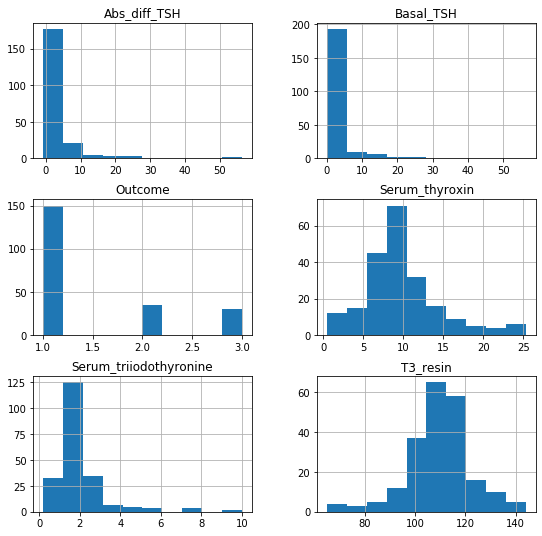

In [8]:
thyroid_data.hist(figsize=(9, 9))

In [9]:
thyroid_data.isnull().sum()

T3_resin                  0
Serum_thyroxin            0
Serum_triiodothyronine    0
Basal_TSH                 0
Abs_diff_TSH              0
Outcome                   0
dtype: int64

In [10]:
thyroid_data.isna().sum()

T3_resin                  0
Serum_thyroxin            0
Serum_triiodothyronine    0
Basal_TSH                 0
Abs_diff_TSH              0
Outcome                   0
dtype: int64

In [11]:
# Features/Response
feature_names = ['T3_resin', 'Serum_thyroxin', 'Serum_triiodothyronine', 'Basal_TSH', 'Abs_diff_TSH']
X = thyroid_data[feature_names]
y = thyroid_data.Outcome

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB


In [13]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(("BNB", BernoulliNB()))

In [14]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.925758
1   DT  0.939610
2  GNB  0.967749
3  BNB  0.734848


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


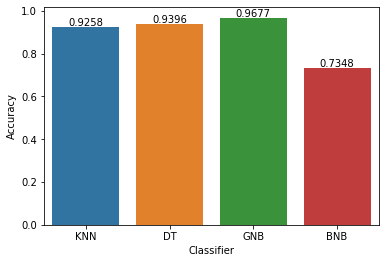

In [15]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

## Part 5

In [18]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(random_state=17)
knn = KNeighborsClassifier(n_neighbors=5)

tree.fit(X_train, y_train)


tree = DecisionTreeClassifier(random_state=17)
knn = KNeighborsClassifier(n_neighbors=5)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
from sklearn.metrics import accuracy_score
tree_pred = tree.predict(X_holdout)
knn_pred = knn.predict(X_holdout_scaled)
print (f" Accuracy for k-nn is {accuracy_score(y_holdout, knn_pred)}")

 Accuracy for k-nn is 0.9230769230769231


In [20]:
tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    4.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_

In [21]:
print (f"Best parameters are {tree_grid.best_params_}") 

Best parameters are {'max_depth': 5, 'max_features': 5}


In [22]:
tree_grid.best_score_ 

0.9199999999999999

In [23]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.9538461538461539

In [24]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.5s finished


({'knn__n_neighbors': 1}, 0.96)

In [25]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout)) 

0.9384615384615385